In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 
from GGA import GGA
from ocat import OCAT
from test import CAModel,Testing1
import helpers
from joblib import Parallel, delayed,parallel_backend

In [139]:
import sys
del sys.modules["test"]

# Preprocessing

In [2]:
if not os.path.isfile("data/data.npy"):
    dirName = "data/images"
    images = []
    paths = []
    for file in os.listdir(dirName):
        if (".png" in file):
            paths.append([int(file.split("_")[1].replace(".png","")),f'{dirName}/{file}'])
    paths = sorted(paths,key=lambda x:x[0])
    for path in paths:
        img = cv2.imread(path[1],cv2.IMREAD_GRAYSCALE)
        images.append(img)
    images=np.array(images)
    values = {}
    count = 0
    for state in images:
        for row in state:
            for j,col in enumerate(row):
                if col not in values:
                    count+=1
                    values[col] = count
                row[j] = values[col]
    np.save("data/data.npy",images)
else:
    print("data.npy already exist")

In [3]:
def getProblemSub2(data,iState,cell,stateSize,currentState,neighborhood,paddingType,paddingValue):
    index = tuple([iState]+cell)
    cls = data[index]
    #start = time.time()
    neighbors = helpers.getNeighbors(cell,neighborhood,stateSize)
    #print("neighbors time {}".format(time.time()-start))
    values = helpers.getNeighborsValue(currentState,neighbors,paddingType,paddingValue)
    #print("neighbors value time {}".format(time.time()-start))
    if values != None:
        values = [values[key] for key in values]
        values.append(cls)
    #print("neighbors value 2 time {}".format(time.time()-start))
    return values
    
def getProblemSub1(data,iState,dataSize,stateSize,noStates,neighborhood,paddingType,paddingValue):
    print(iState)
    currentState = data[iState-1].reshape(-1)
    backend = 'threading'
    with parallel_backend(backend):
        vlscls = Parallel(n_jobs=4)(delayed(getProblemSub2) (data,iState,cell,stateSize,currentState,neighborhood,paddingType,paddingValue) for cell in helpers.multiDimensionalGenerator(stateSize))
        vlscls = list(filter(lambda x: x != None,vlscls))
    return vlscls

def getProblem(data,neighborhood,paddingType,paddingValue):
    problem = []
    dataSize = np.shape(data)
    stateSize = dataSize[1:]
    noStates = dataSize[0]
    backend = 'threading'
    with parallel_backend(backend):
        problem = Parallel(n_jobs=4)(delayed(getProblemSub1)(data,iState,dataSize,stateSize,noStates,neighborhood,paddingType,paddingValue) for iState in range(1,noStates))
        problem = np.concatenate(problem)
    return problem

In [4]:
data= np.load("data/data.npy")

In [5]:
np.shape(data)

(600, 400, 640)

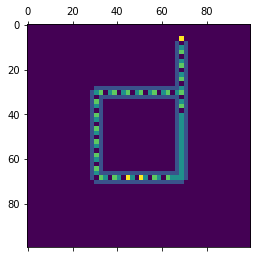

In [6]:
plt.matshow(data[-1,150:250,270:370])

In [7]:
radious = 1
neighborhood = helpers.moore([radious,radious])
data = getProblem(data[:200,150:250,270:370],neighborhood,1,-1)

123

4

5
6
7
8
91011


12
1314

15
16
171819


20
21
22
2324

25
2627

28
29
30
31
32
33
34
35
36
37
38
39
40
41
4243

44
45
4647

48
49
5051

52
53
5455

56
57
5859

60
61
6263

64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
9192

93
94
9596

97
98
99
100
101
102
103
104
105
106
107
108
109
110
111112

113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147148

149
150
151152

153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [8]:
modelGGA = GGA(data,np.shape(data)[1]-1,path="saves/Experiment1",verbose=0,noChilds=10,noChromosomes=100)

In [9]:
modelGGA.run()

config saved at saves/Experiment1/30_01_20_10_57_15/config.json
iteration 1
goal = 1goal = 2goal = 5


goal = 3
goal 3 elapsed time: 1.1399996280670166goal 1 elapsed time: 1.206000804901123
goal = 4goal 2 elapsed time: 1.2390000820159912
goal = 6goal 5 elapsed time: 1.2430005073547363



goal 4 elapsed time: 0.6110033988952637goal 6 elapsed time: 0.6089997291564941

iteration 2
goal = 1goal = 2goal = 5
goal = 3


goal 5 elapsed time: 0.16700053215026855goal 2 elapsed time: 0.19000029563903809goal 3 elapsed time: 0.18500232696533203


goal = 4goal = 6
goal 1 elapsed time: 0.21599960327148438

goal 4 elapsed time: 0.08199930191040039
goal 6 elapsed time: 0.10699748992919922
iteration 3
goal = 1
goal = 2goal = 5
goal = 3

goal 1 elapsed time: 0.1620018482208252
goal 3 elapsed time: 0.18599963188171387goal 2 elapsed time: 0.19900250434875488
goal = 4

goal = 6goal 5 elapsed time: 0.21199989318847656

goal 4 elapsed time: 0.10500383377075195
goal 6 elapsed time: 0.09999918937683105
iteratio

In [10]:
caggamodel = CAModel(modelGGA.rules,neighborhood,1,-1)

In [11]:
modelOCAT = OCAT(data,np.shape(data)[1]-1)

problem
matrix
domain
binarized
bdomains
indexes
dindex
pos index
neg index
auxiliar
terms


In [12]:
modelOCAT.train()

training for value 1
409
113
101
98
91
86
74
73
72
69
68
68
63
62
61
61
59
59
58
45
42
42
42
41
38
36
35
34
33
32
30
29
29
25
25
24
20
16
15
13
13
11
9
9
9
9
9
8
7
7
7
7
7
7
7
7
7
7
difficult element 100/1000 to delete it
7
7
7
7
7
7
7
7
7
7
difficult element 200/1000 to delete it
7
7
7
7
7
7
7
7
7
7
difficult element 300/1000 to delete it
7
7
7
7
7
7
7
7
7
7
difficult element 400/1000 to delete it
7
7
7
7
7
7
7
7
7
7
difficult element 500/1000 to delete it
7
7
7
7
7
7
7
7
7
7
difficult element 600/1000 to delete it
7
7
7
7
7
7
7
7
7
7
difficult element 700/1000 to delete it
7
7
7
5
5
5
5
5
5
5
5
5
5
difficult element 100/1000 to delete it
5
5
5
5
5
5
5
5
5
5
difficult element 200/1000 to delete it
5
5
5
5
5
5
5
5
5
5
difficult element 300/1000 to delete it
5
5
5
5
5
5
5
5
5
5
difficult element 400/1000 to delete it
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
difficult element 100/1000 to delete it
4
4
4
4
4
4
4
4
4
4
difficult element 200/1000 to delete it
4
4
4
4
4
4
4
4
4
4
difficult elemen

[[1,
  [{(4, 2, '<'), (4, 4, '>=')},
   {(0, 7, '>='),
    (3, 2, '<'),
    (3, 3, '<'),
    (3, 5, '>='),
    (4, 3, '>='),
    (6, 7, '>=')},
   {(2, 1, '<'),
    (2, 3, '<'),
    (2, 6, '>='),
    (2, 7, '>='),
    (4, 2, '>='),
    (6, 3, '<')},
   {(2, 1, '<'), (3, 6, '>='), (4, 6, '<'), (6, 7, '>='), (8, 5, '>=')},
   {(2, 1, '<'),
    (2, 5, '<'),
    (2, 6, '>='),
    (4, 2, '>='),
    (5, 1, '<'),
    (6, 2, '<')},
   {(0, 6, '>='), (1, 3, '<'), (2, 2, '<'), (2, 5, '>='), (4, 2, '>=')},
   {(3, 3, '<'), (3, 7, '>='), (4, 3, '>='), (6, 6, '>='), (7, 4, '<')},
   {(0, 2, '>='), (2, 1, '<'), (7, 7, '>='), (8, 6, '<'), (8, 7, '<')},
   {(0, 2, '<'),
    (0, 3, '>='),
    (1, 4, '>='),
    (2, 1, '<'),
    (4, 2, '>='),
    (5, 2, '<'),
    (5, 5, '<'),
    (5, 6, '>='),
    (8, 2, '<')},
   {(0, 5, '<'),
    (0, 7, '>='),
    (1, 4, '>='),
    (6, 7, '>='),
    (8, 3, '<'),
    (8, 5, '>=')},
   {(0, 2, '>='),
    (0, 4, '>='),
    (1, 3, '>='),
    (2, 1, '<'),
    (4, 2, '>='),


In [13]:
id = 300
count = {}
other = {}
for id in range(len(data)):
    for op in modelOCAT.rules2:
        if modelOCAT.rules2[op](data[id,:-1]) and op == data[id,-1]:
            if op not in count:
                count[op] = 0
            count[op] +=1
            break
        if modelOCAT.rules2[op](data[id,:-1]) and  op != data[id,-1]:
            if op not in other:
                other[op] = 0
            other[op] +=1
            break
count,other

({1: 1801479, 2: 123148, 5: 1435, 3: 27020, 4: 10419, 6: 180},
 {5: 17478, 4: 6183, 3: 2193, 1: 202, 6: 227, 2: 36})

In [14]:
caocatmodel = CAModel(modelOCAT.rules2,neighborhood,1,-1)

In [15]:
data= np.load("data/data.npy")
data = data[:300,150:250,270:370]
data=np.array(data)

Testing:
state 1/300
Static : 9641/9752
Dynamic : 228/248
state 2/300
Static : 9641/9748
Dynamic : 227/252
state 3/300
Static : 9657/9760
Dynamic : 218/240
state 4/300
Static : 9657/9756
Dynamic : 222/244
state 5/300
Static : 9661/9756
Dynamic : 222/244
state 6/300
Static : 9669/9760
Dynamic : 219/240
state 7/300
Static : 9669/9756
Dynamic : 222/244
state 8/300
Static : 9669/9752
Dynamic : 226/248
state 9/300
Static : 9661/9740
Dynamic : 234/260
state 10/300
Static : 9683/9756
Dynamic : 222/244
state 11/300
Static : 9683/9752
Dynamic : 226/248
state 12/300
Static : 9682/9748
Dynamic : 229/252
state 13/300
Static : 9671/9736
Dynamic : 234/264
state 14/300
Static : 9687/9752
Dynamic : 224/248
state 15/300
Static : 9681/9748
Dynamic : 227/252
state 16/300
Static : 9677/9744
Dynamic : 228/256
state 17/300
Static : 9662/9732
Dynamic : 236/268
state 18/300
Static : 9673/9748
Dynamic : 223/252
state 19/300
Static : 9666/9744
Dynamic : 224/256
state 20/300
Static : 9654/9736
Dynamic : 230/264


<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

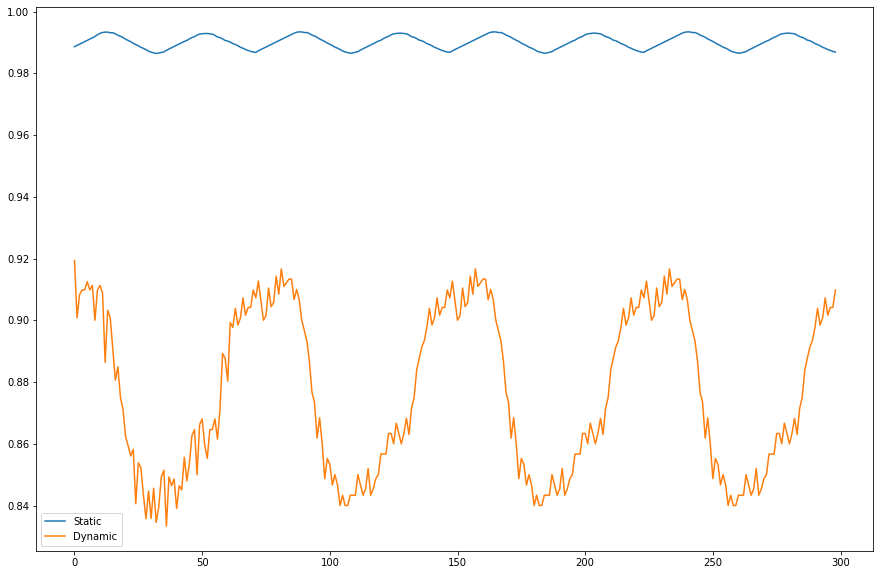

In [16]:
test1 = Testing1(data,caocatmodel,verbose=1)
test1.run()
test1.plot()

Testing:
state 1/300
Static : 9486/9752
Dynamic : 36/248
state 2/300
Static : 9473/9748
Dynamic : 37/252
state 3/300
Static : 9480/9760
Dynamic : 35/240
state 4/300
Static : 9478/9756
Dynamic : 35/244
state 5/300
Static : 9470/9756
Dynamic : 35/244
state 6/300
Static : 9471/9760
Dynamic : 33/240
state 7/300
Static : 9469/9756
Dynamic : 34/244
state 8/300
Static : 9459/9752
Dynamic : 33/248
state 9/300
Static : 9446/9740
Dynamic : 30/260
state 10/300
Static : 9454/9756
Dynamic : 34/244
state 11/300
Static : 9448/9752
Dynamic : 32/248
state 12/300
Static : 9443/9748
Dynamic : 29/252
state 13/300
Static : 9432/9736
Dynamic : 31/264
state 14/300
Static : 9436/9752
Dynamic : 32/248
state 15/300
Static : 9439/9748
Dynamic : 30/252
state 16/300
Static : 9439/9744
Dynamic : 33/256
state 17/300
Static : 9426/9732
Dynamic : 30/268
state 18/300
Static : 9441/9748
Dynamic : 34/252
state 19/300
Static : 9443/9744
Dynamic : 35/256
state 20/300
Static : 9438/9736
Dynamic : 33/264
state 21/300
Static 

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

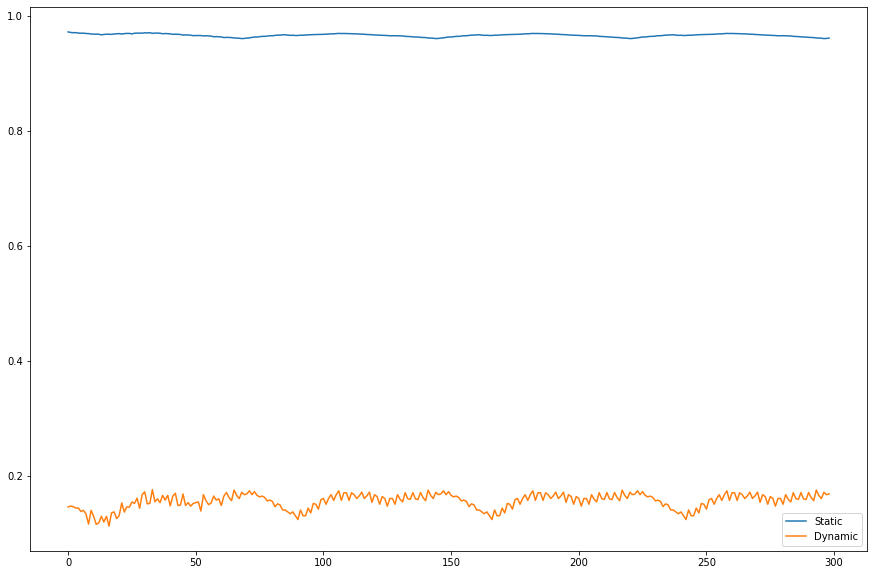

In [17]:
test2 = Testing1(data,caggamodel,verbose=1)
test2.run()
test2.plot()

In [18]:
data.shape

(300, 100, 100)

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

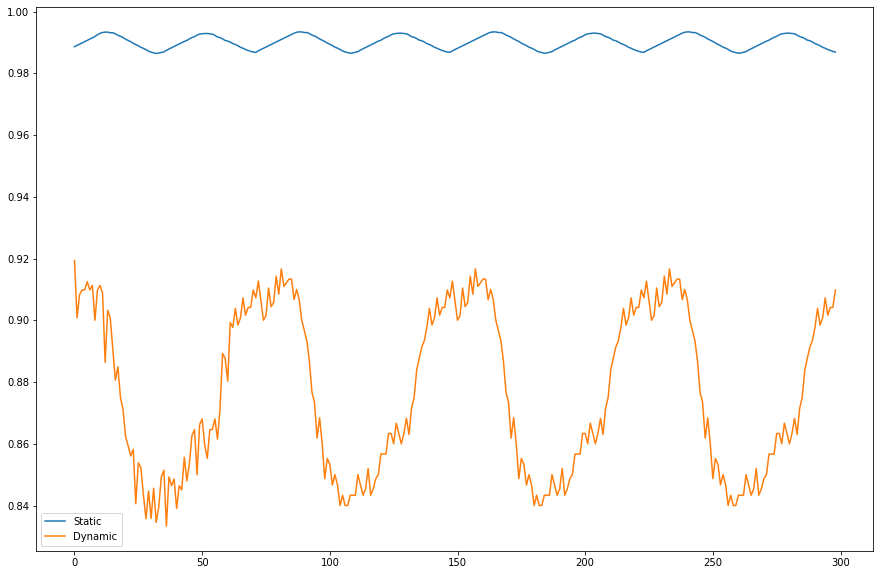

In [19]:
test1.plot()

<module 'matplotlib.pyplot' from 'C:\\Users\\hecto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

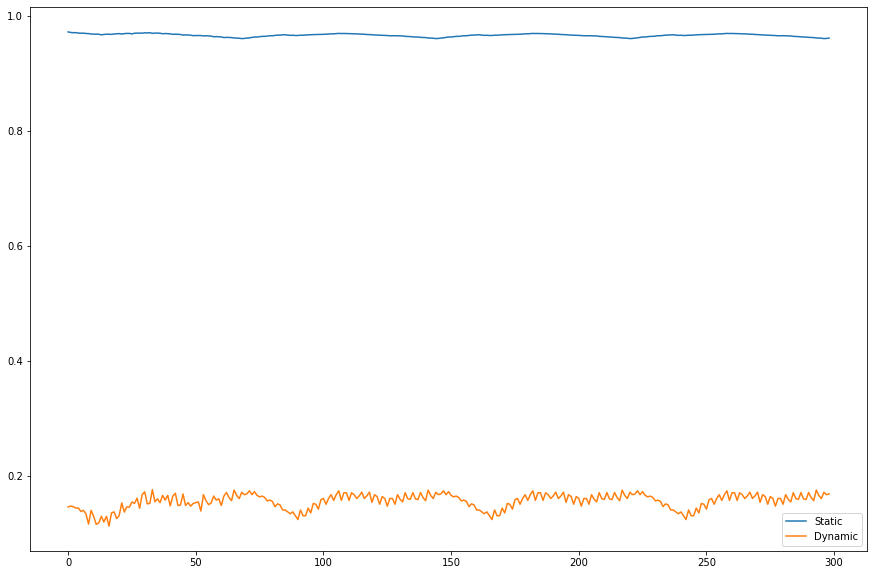

In [20]:
test2.plot()

In [21]:
np.save("saves/Experiment1/30_01_20_10_57_15/ocat/result.npy",test1.result)

In [22]:
np.save("saves/Experiment1/30_01_20_10_57_15/gga/result.npy",test2.result)